In [1]:
#lets explore telco data
import pandas as pd 
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle
import Explore
import prepare

import warnings
warnings.filterwarnings('ignore')

#### As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In [2]:
tdf = wrangle.get_telco_tenure()
tdf = wrangle.clean_telco_tenure(tdf)
train, validate, test = wrangle.split_for_model(tdf)

train(949, 4),validate(407, 4),test(339, 4)


In [3]:
train_scaled, validate_scaled, test_scaled = prepare.scale_telco_data(train.drop(columns='customer_id'), validate.drop(columns='customer_id'), test.drop(columns='customer_id'), scale_type='MinMax')

In [4]:
tdf[:5]

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [5]:
#lets explore distribution
col = tdf.drop(columns = ['customer_id'])

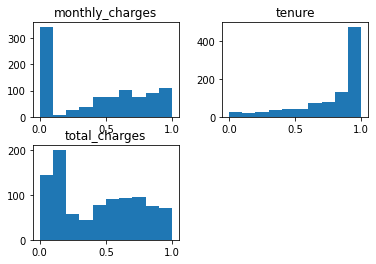

In [6]:
Explore.get_distribution(train_scaled)

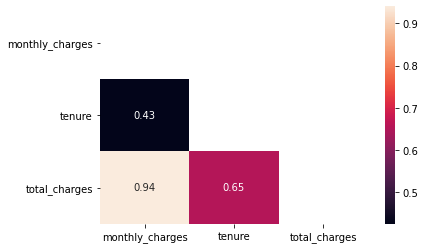

In [7]:
#heatmap
Explore.get_heatmap(train_scaled)

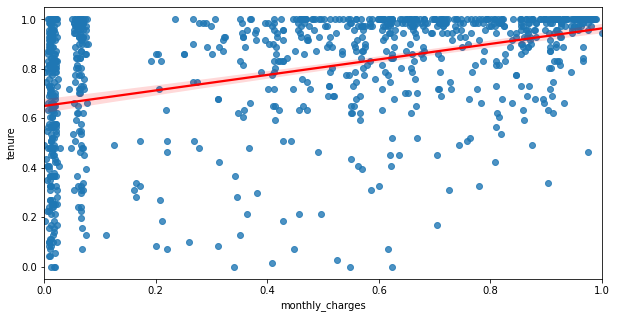

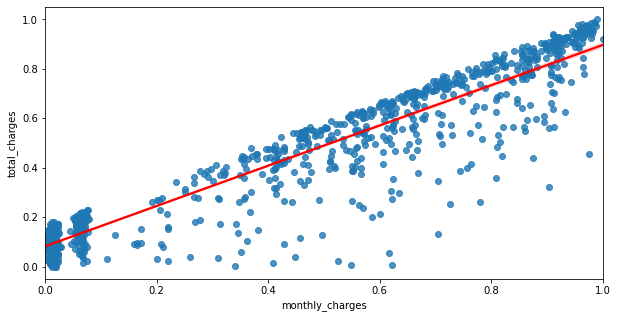

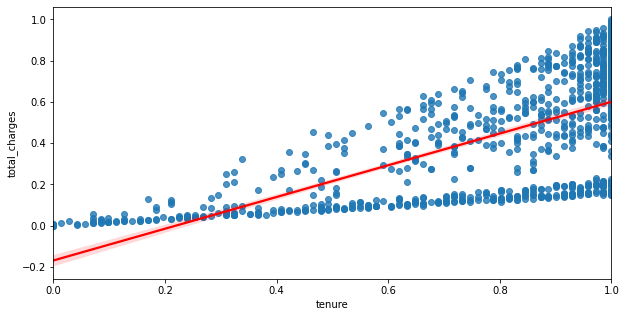

In [8]:
#1
Explore.plot_variable_pairs(train_scaled)


In [9]:
#3
train = Explore.month_to_year(train)

In [10]:
train

,customer_id,monthly_charges,tenure,total_charges,tenure_in_years
999,6013-BHCAW,81.00,61,4976.15,5
387,2323-ARSVR,111.05,67,7321.05,5
347,2167-FQSTQ,92.40,72,6786.10,6
1393,8207-VVMYB,26.00,70,2006.95,5
888,5346-BZCHP,19.40,69,1346.20,5
...,...,...,...,...,...
953,5781-RFZRP,73.50,71,5357.75,5
244,1447-PJGGA,95.25,57,5464.65,4
454,2789-CZANW,110.30,64,6997.30,5
966,5846-ABOBJ,24.45,71,1730.65,5


In [11]:
#4
cat_var = ['tenure_in_years']
con_var = ['total_charges', 'tenure', 'monthly_charges']

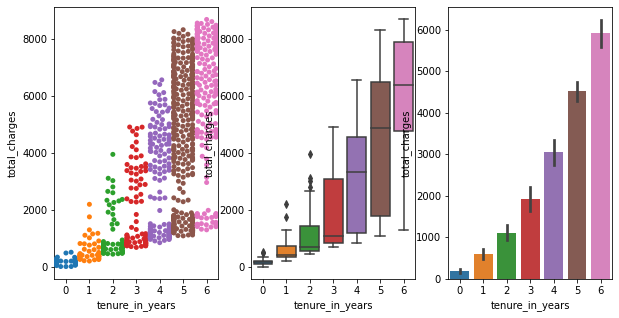

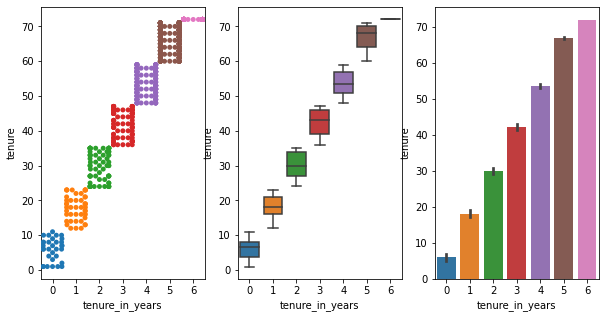

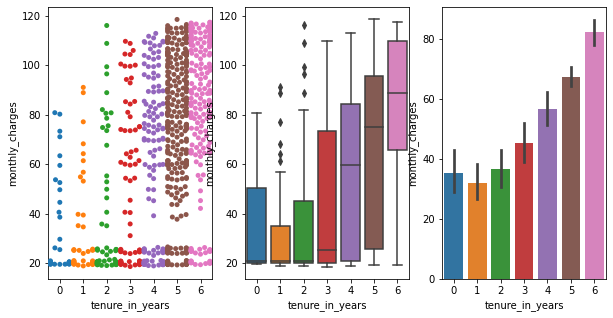

In [12]:
Explore.plot_cat_and_cont(cat_var, con_var, train)

## Mall customers

In [13]:
mall_df = wrangle.get_mall_customers()

In [14]:
mall_df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


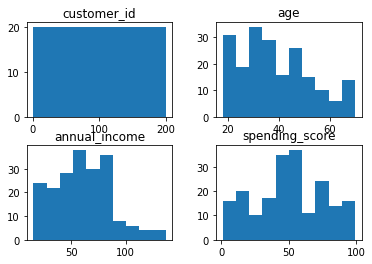

In [15]:
Explore.get_distribution(mall_df)

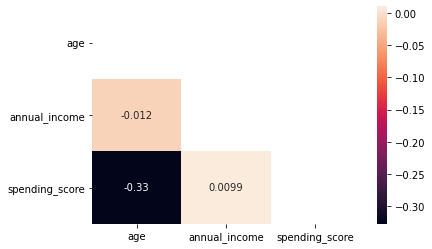

In [16]:
Explore.get_heatmap(mall_df.drop(columns='customer_id'))

In [17]:
#the older you are, the lower your spending score

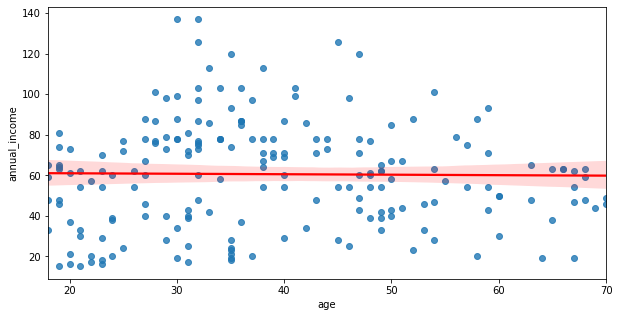

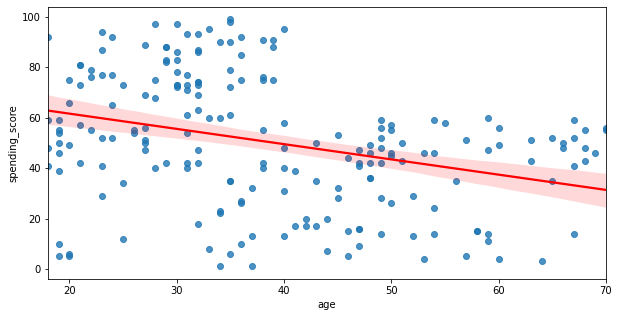

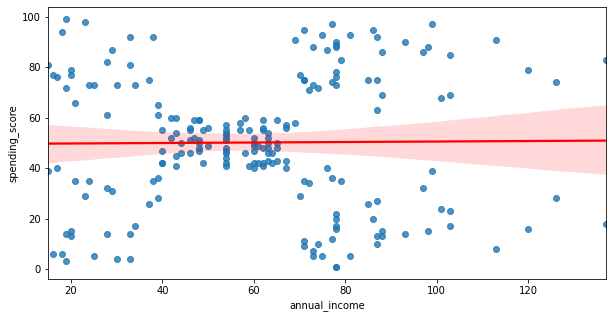

In [18]:
Explore.plot_variable_pairs(mall_df.drop(columns=['customer_id', 'gender']))

In [19]:
cat_var = ['gender']
con_var = ['annual_income', 'spending_score','age']

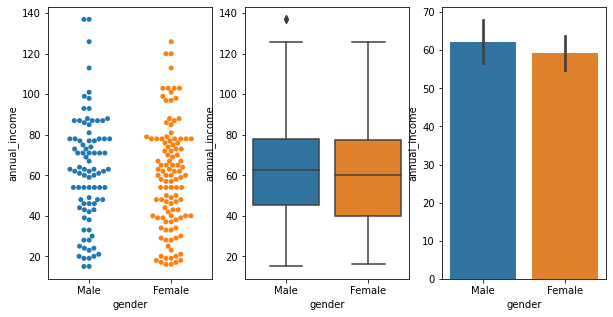

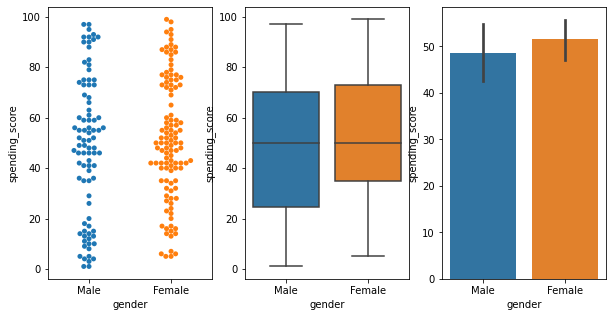

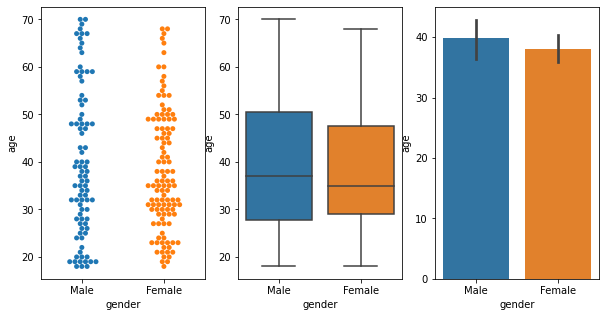

In [20]:
Explore.plot_cat_and_cont(cat_var, con_var, mall_df)